# Data Analysis

In [1]:
import seaborn as sns
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt

In [2]:
disease_data_filepath = ("CVD_cleaned.csv")
disease_data = pd.read_csv(disease_data_filepath)
print(disease_data.head())
print(disease_data.shape)

  General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  

In [3]:
print(disease_data.shape)
print(disease_data.isnull().any())
print(disease_data.dtypes)
print(disease_data["Age_Category"].unique())

['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']


In [4]:
print(disease_data.columns)

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')


The beginning of the analysis. 

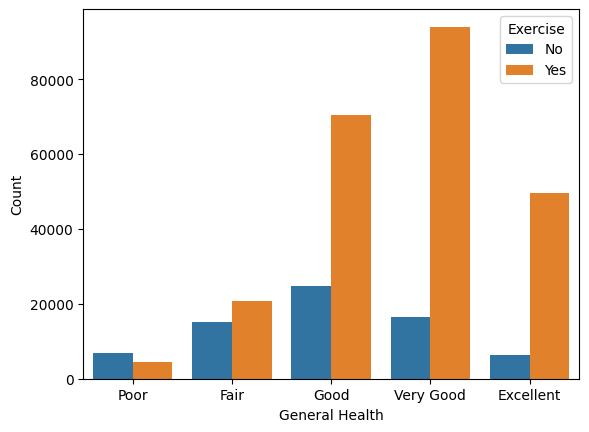

In [7]:
general_health_order = ["Poor", "Fair", "Good", "Very Good", "Excellent"]

sns.countplot(x="General_Health", data=disease_data, order=general_health_order, hue="Exercise")
plt.ylabel("Count")
plt.xlabel("General Health")
plt.show()


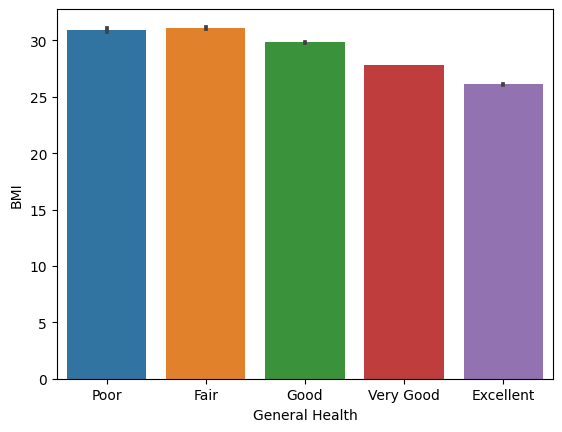

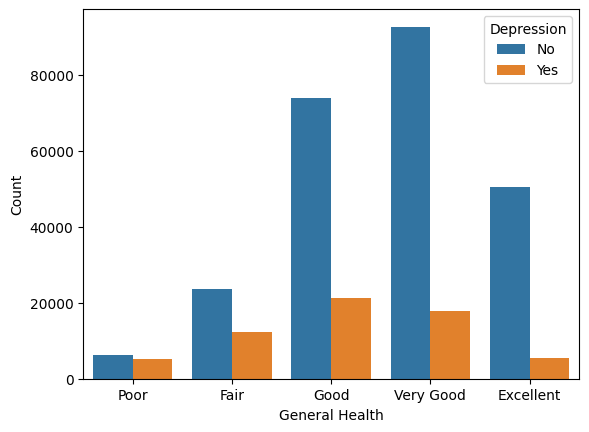

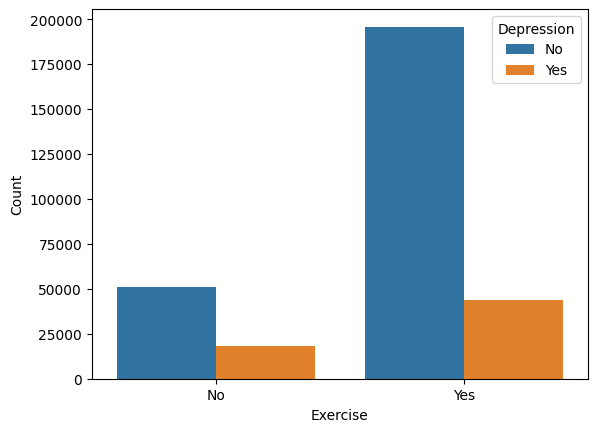

In [11]:
sns.barplot(x="General_Health", y="BMI", order=general_health_order,  data=disease_data)
plt.xlabel("General Health")
plt.show()

sns.countplot(x="General_Health", hue="Depression", data=disease_data, order=general_health_order)
plt.xlabel("General Health")
plt.ylabel("Count")
plt.show()

sns.countplot(x="Exercise", hue="Depression", data=disease_data)
plt.xlabel("Exercise")
plt.ylabel("Count")
plt.show()

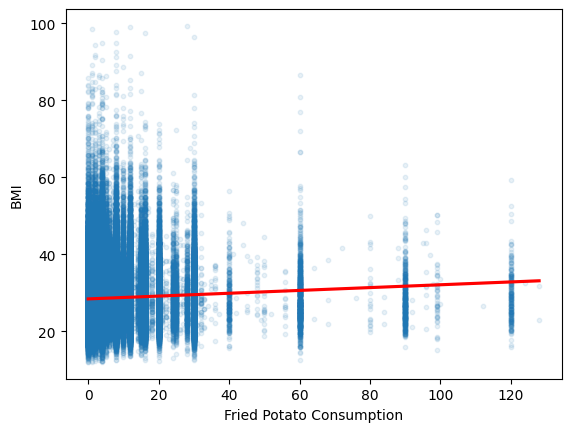

In [17]:
sns.regplot(x="FriedPotato_Consumption", y="BMI", data=disease_data, scatter_kws={'alpha': 0.1, 's': 10}, line_kws={'color': 'red'})
plt.xlabel("Fried Potato Consumption")
plt.show()

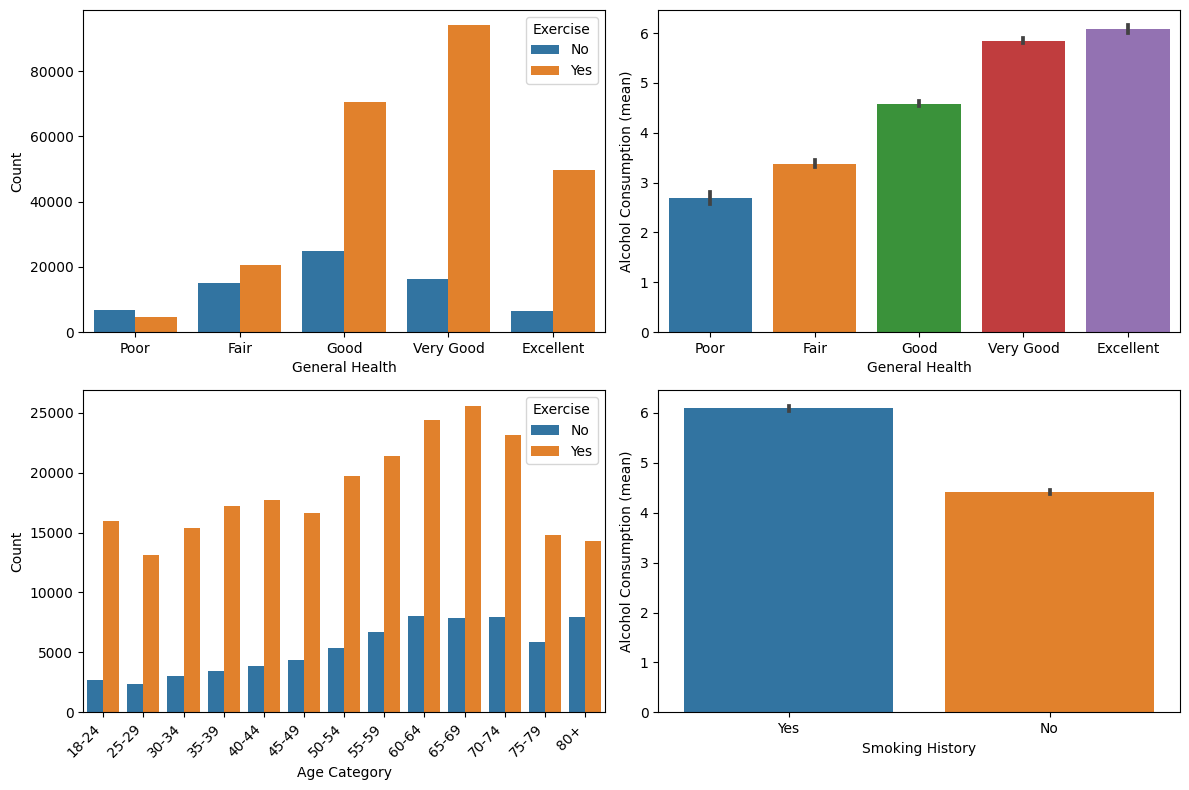

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

general_health_order = ["Poor", "Fair", "Good", "Very Good", "Excellent"]
age_category_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

sns.countplot(x="General_Health", hue="Exercise", data = disease_data, order=general_health_order, ax=axes[0, 0])
axes[0, 0].set_xlabel("General Health")
axes[0, 0].set_ylabel("Count")

sns.barplot(x='General_Health', y='Alcohol_Consumption', data=disease_data, order=general_health_order, estimator='mean', ax=axes[0, 1])
axes[0, 1].set_xlabel("General Health")
axes[0, 1].set_ylabel("Alcohol Consumption (mean)")

sns.countplot(x="Age_Category", hue="Exercise", data=disease_data, order=age_category_order, ax=axes[1, 0])
axes[1, 0].set_xlabel("Age Category")
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x='Smoking_History', y='Alcohol_Consumption', data=disease_data, estimator='mean', ax=axes[1, 1])
axes[1, 1].set_xlabel("Smoking History")
axes[1, 1].set_ylabel("Alcohol Consumption (mean)")

plt.tight_layout()
plt.show()

Top right barplot contradicts common sense. It is crucial to understand the reasons behind it.

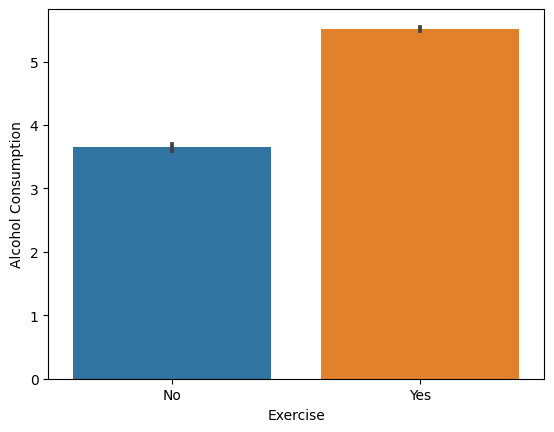

In [25]:
sns.barplot(x='Exercise', y='Alcohol_Consumption', data=disease_data)
plt.ylabel("Alcohol Consumption")
plt.show()

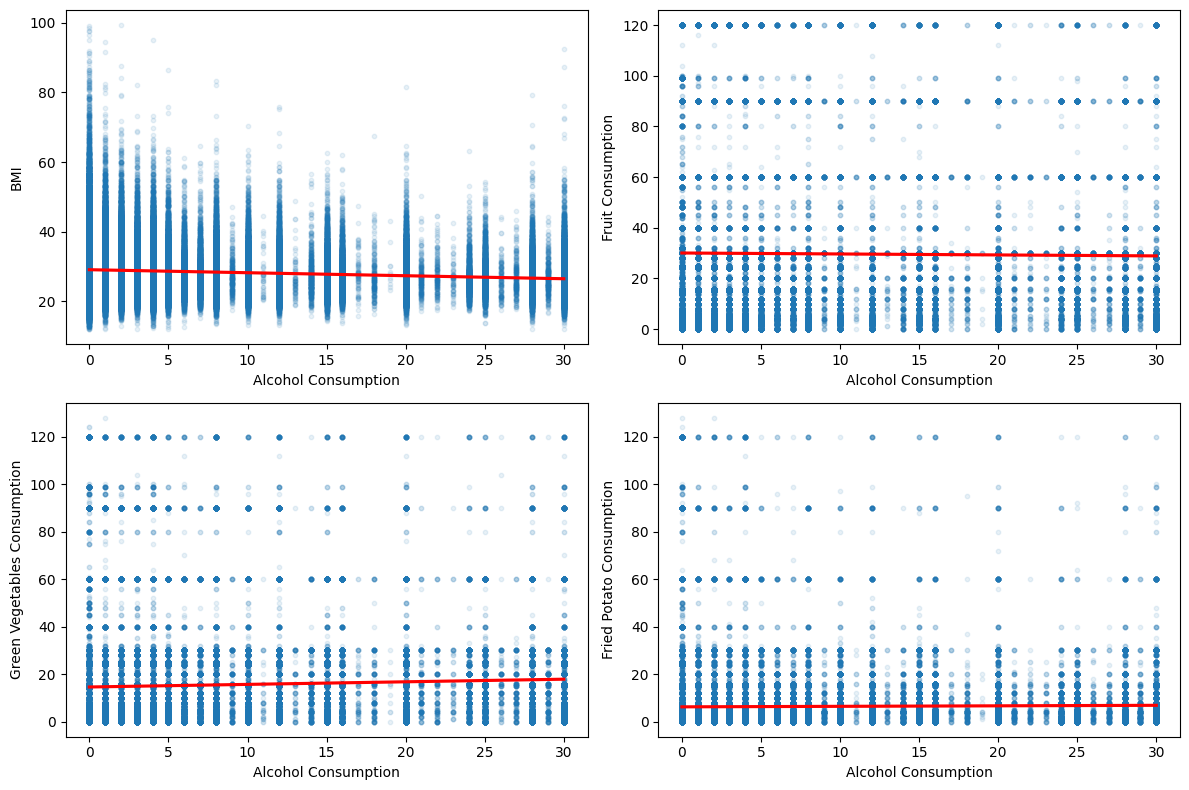

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.regplot(x="Alcohol_Consumption", y="BMI", data=disease_data, scatter_kws={'alpha': 0.1, 's': 10}, line_kws={'color': 'red'}, ax=axes[0, 0])
axes[0, 0].set_xlabel("Alcohol Consumption")

sns.regplot(x="Alcohol_Consumption", y="Fruit_Consumption", data=disease_data, scatter_kws={'alpha': 0.1, 's': 10}, line_kws={'color': 'red'}, ax=axes[0, 1])
axes[0, 1].set_xlabel("Alcohol Consumption")
axes[0, 1].set_ylabel("Fruit Consumption")

sns.regplot(x="Alcohol_Consumption", y="Green_Vegetables_Consumption", data=disease_data, scatter_kws={'alpha': 0.1, 's': 10}, line_kws={'color': 'red'}, ax=axes[1, 0])
axes[1, 0].set_xlabel("Alcohol Consumption")
axes[1, 0].set_ylabel("Green Vegetables Consumption")

sns.regplot(x="Alcohol_Consumption", y="FriedPotato_Consumption", data=disease_data, scatter_kws={'alpha': 0.1, 's': 10}, line_kws={'color': 'red'}, ax=axes[1, 1])
axes[1, 1].set_xlabel("Alcohol Consumption")
axes[1, 1].set_ylabel("Fried Potato Consumption")

plt.tight_layout()
plt.show()

From here I will look for any relationship between heart disease and other 'features'

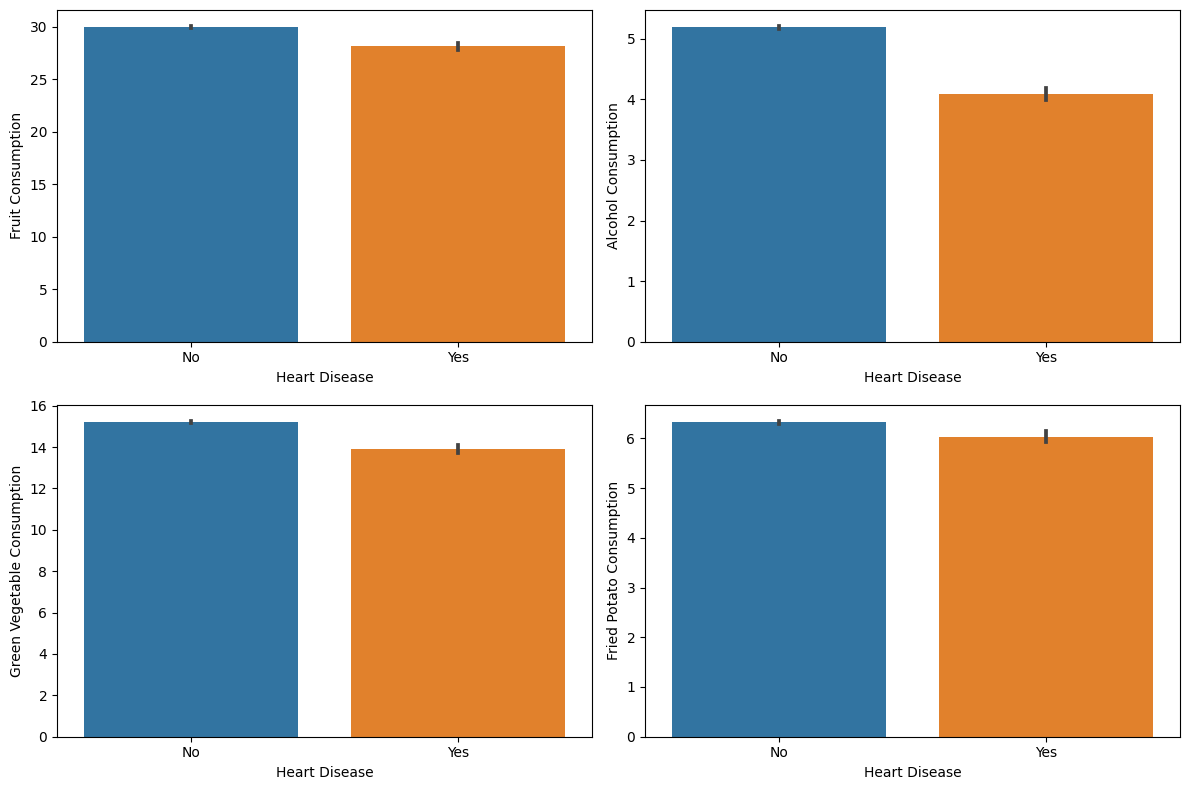

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.barplot(x='Heart_Disease', y='Fruit_Consumption', data=disease_data, ax=axes[0, 0])
axes[0, 0].set_xlabel("Heart Disease")
axes[0, 0].set_ylabel("Fruit Consumption")

sns.barplot(x='Heart_Disease', y='Alcohol_Consumption', data=disease_data, ax=axes[0, 1])
axes[0, 1].set_xlabel("Heart Disease")
axes[0, 1].set_ylabel("Alcohol Consumption")

sns.barplot(x='Heart_Disease', y='Green_Vegetables_Consumption', data=disease_data, ax=axes[1, 0])
axes[1, 0].set_xlabel("Heart Disease")
axes[1, 0].set_ylabel("Green Vegetable Consumption")

sns.barplot(x='Heart_Disease', y='FriedPotato_Consumption', data=disease_data, ax=axes[1, 1])
axes[1, 1].set_xlabel("Heart Disease")
axes[1, 1].set_ylabel("Fried Potato Consumption")

plt.tight_layout()
plt.show()

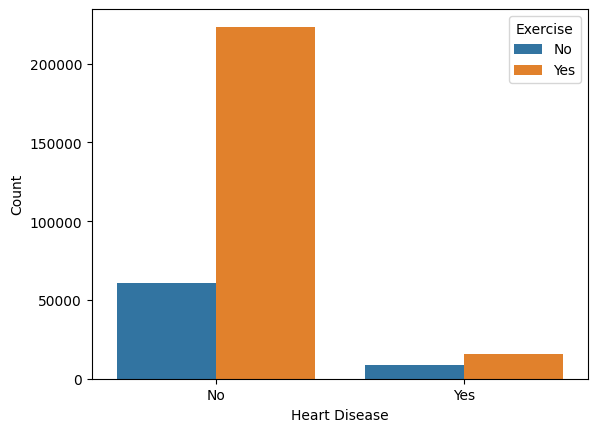

In [29]:
sns.countplot(x="Heart_Disease", hue="Exercise", data = disease_data)
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

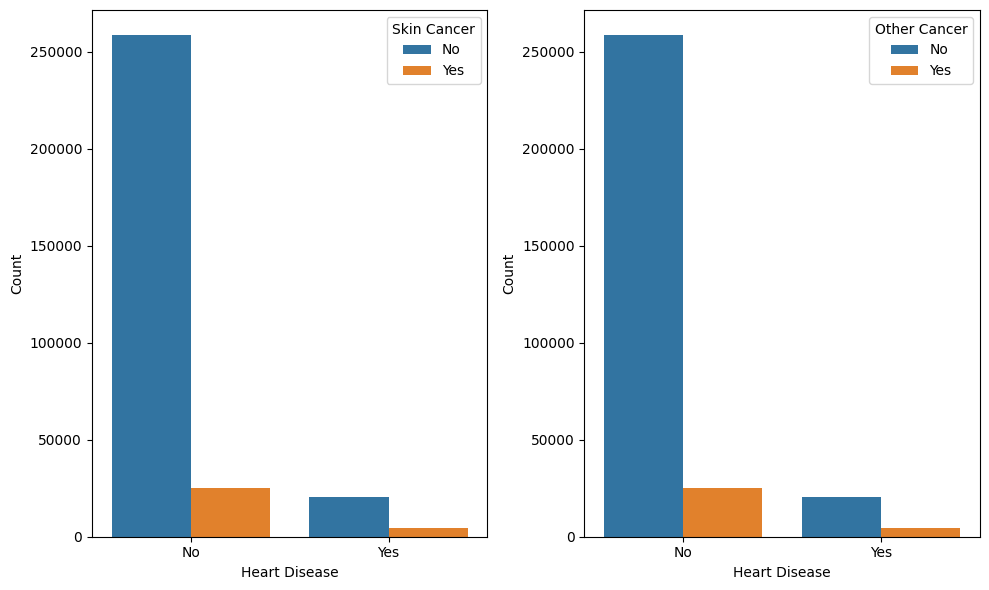

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

sns.countplot(x="Heart_Disease", hue="Skin_Cancer", data=disease_data, ax=axes[0])
axes[0].set_xlabel("Heart Disease")
axes[0].set_ylabel("Count")
legend1 = "Skin Cancer"
axes[0].get_legend().set_title(legend1)

sns.countplot(x="Heart_Disease", hue="Other_Cancer", data=disease_data, ax=axes[1])
axes[1].set_xlabel("Heart Disease")
axes[1].set_ylabel("Count")
legend2 = "Other Cancer"
axes[1].get_legend().set_title(legend2)

plt.tight_layout()
plt.show()

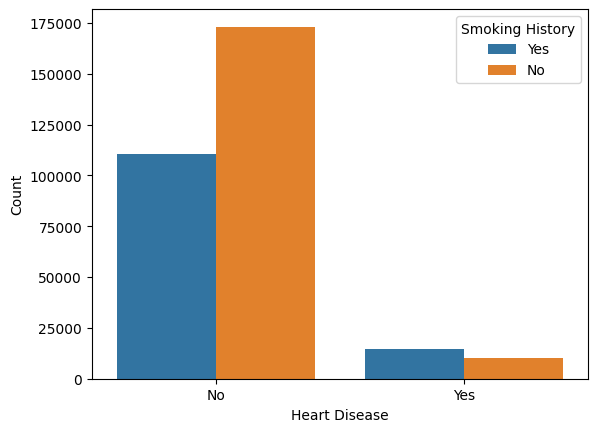

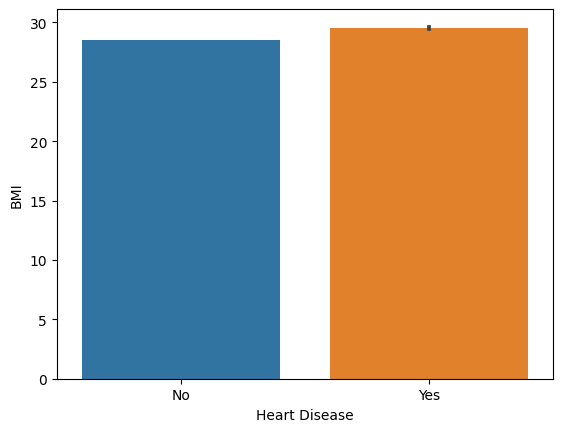

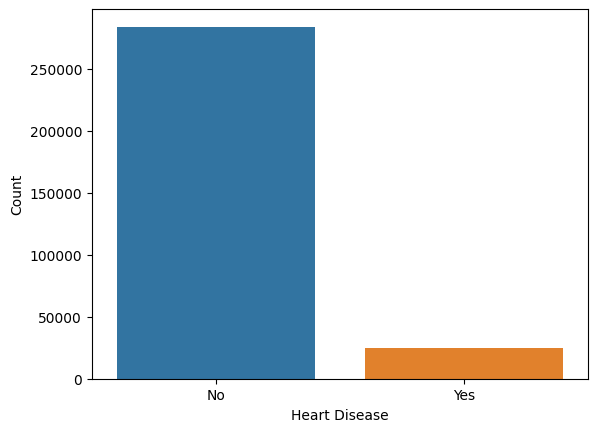

In [12]:
sns.countplot(x="Heart_Disease", hue="Smoking_History", data=disease_data)
plt.xlabel("Heart Disease")
plt.ylabel("Count")
legend_title = "Smoking History"
plt.legend(title=legend_title)
plt.show()

sns.barplot(x="Heart_Disease", y="BMI", data=disease_data)
plt.xlabel("Heart Disease")
plt.show()

sns.countplot(x="Heart_Disease", data=disease_data)
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()